<a href="https://colab.research.google.com/github/vs1991/HRAnalytics/blob/main/HRAnalytics_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('../Greyatom',force_remount=True)

Mounted at ../Greyatom


In [3]:
cd ../Greyatom/'My Drive'/'Data Science'/'HR'

/Greyatom/My Drive/Data Science/HR


In [4]:
ls

sample_submission_M0L0uXE.csv  Seaborn_Pie_Chart.png  train_LZdllcl.csv
Seaborn_Bar_Vertical.png       test_2umaH9m.csv


In [5]:
import pandas as pd
import numpy as np 

#Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 5.0)

#machine learning 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
data_raw=pd.read_csv('train_LZdllcl.csv')

data_val=pd.read_csv('test_2umaH9m.csv')

In [7]:
data1=data_raw.copy(deep=True)


In [250]:
data1.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [241]:
print("Shape of train :", data_raw.shape)
print("Shape of test :", data_val.shape)

Shape of train : (54808, 14)
Shape of test : (23490, 13)


In [244]:
data_raw.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [246]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [248]:
data_raw.isnull().any()

employee_id             False
department              False
region                  False
education                True
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating     True
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

In [249]:
data_raw.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

**Lets make some assumptions and check via visualization if it is true**.

1.   **One thing we know is candidates who has a kpi >60 is eligible for promotion and has higher chance of getting promoted.**
2.   **Candidates with Masters and above should have a higher chance of gettting promoted.**
3.   **People who have undergone training has a good chance of getting promoted.**
4.   **Length of service(Experience) candidates with exprience has higher chance of getting promoted**
5.     **Candidates with good training score has a good chance of getting promoted**


In [173]:
((data1['is_promoted'].value_counts(normalize=True))*100)[1]

8.517004816815064

In [174]:
print('Percentage of promoted employees is {:.2f}%'.format(((data1['is_promoted'].value_counts(normalize=True))*100)[1]))

Percentage of promoted employees is 8.52%


Let us divide the dataset into categorical and numerical features for better  insights.

We will do univariate and bivariate anyalysis(feature vs target variable) to understand more.If required we will do some feature engineering and create new variables.




 Categorical values 


1.   Univariate Analysis
2.   Bivariate *Analysis*



#  **Categorical Analysis**

##  **Categorical(Univariate Analysis)**

Seperating categorical features from the dataframe

In [74]:
cat=data1[['department','education','gender','recruitment_channel','KPIs_met >80%','awards_won?','is_promoted','region']]
cat.head()

,department,education,gender,recruitment_channel,KPIs_met >80%,awards_won?,is_promoted,region
0,Sales & Marketing,Master's & above,f,sourcing,1,0,0,region_7
1,Operations,Bachelor's,m,other,0,0,0,region_22
2,Sales & Marketing,Bachelor's,m,sourcing,0,0,0,region_19
3,Sales & Marketing,Bachelor's,m,other,0,0,0,region_23
4,Technology,Bachelor's,m,other,0,0,0,region_26


Let us check how many unique values are there in each columns









In [10]:
cat.nunique()

department             9
education              3
gender                 2
recruitment_channel    3
KPIs_met >80%          2
awards_won?            2
is_promoted            2
dtype: int64

<BarContainer object of 9 artists>

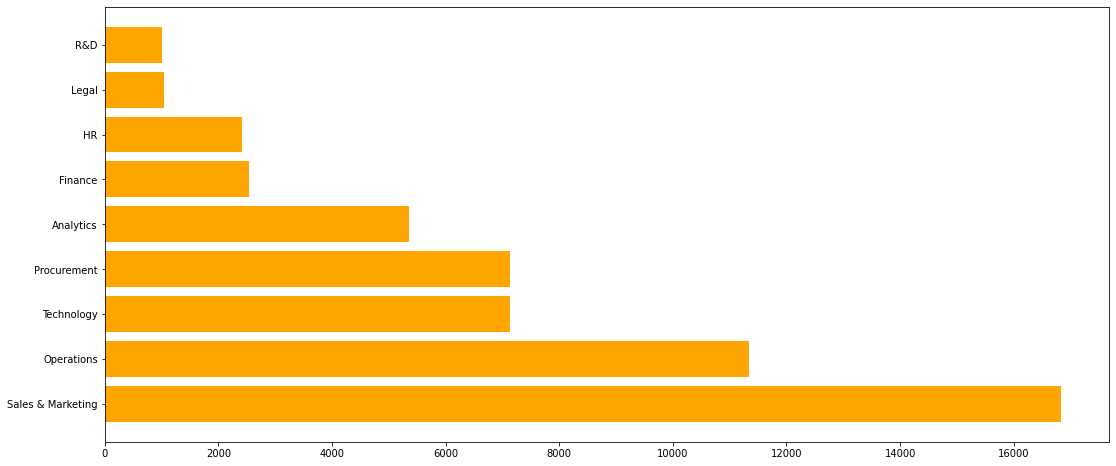

In [89]:

plt.figure(figsize = (18, 8))
plt.barh(cat['department'].value_counts().index,cat['department'].value_counts().values,
        color='orange')


**Getting the total counts of classes in each variable**

**Most candidates is from sales and marketing (almost 50%)**

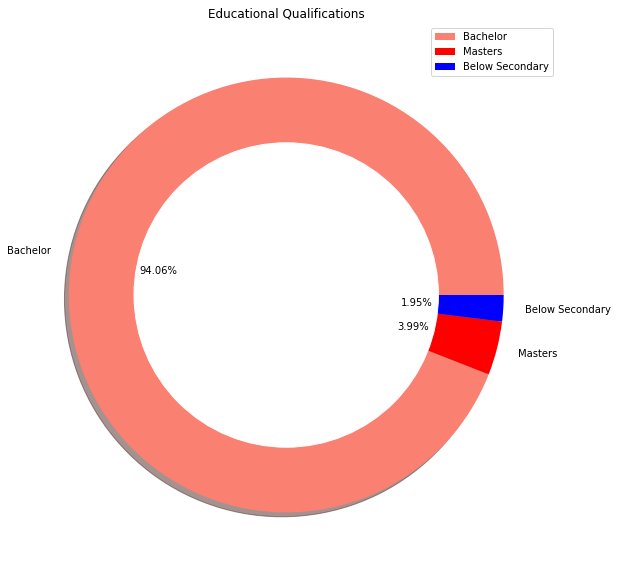

In [130]:
size=[53538,2270,1111]
colors=['salmon','red','blue']
labels='Bachelor','Masters','Below Secondary'
explode=0,0.8,0.8

my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Educational Qualifications')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()


**Most of the candidates have a bachelors degree(94%)**

In [236]:
cat['awards_won?'].value_counts()


0    53538
1     1270
Name: awards_won?, dtype: int64

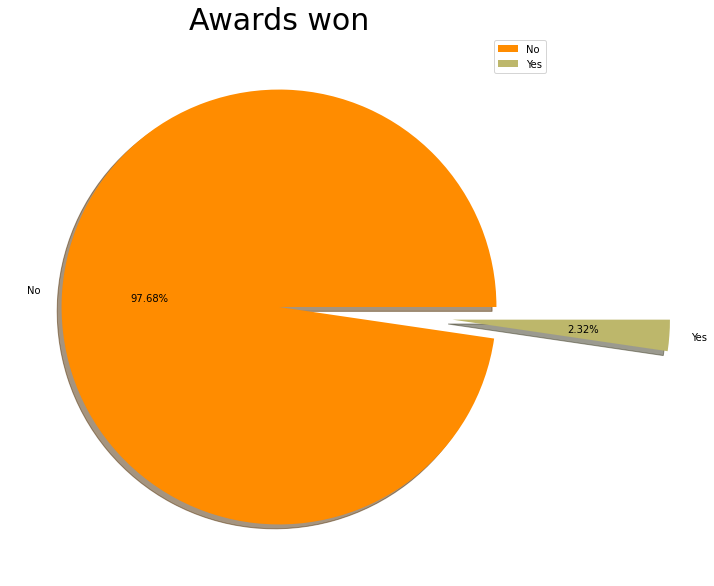

In [145]:
size=[53538,1270]
colors=['darkorange','darkkhaki']
labels='No','Yes'
explode=0,0.8

my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%',explode=explode)
plt.title('Awards won',fontsize=30)
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.legend()
plt.show()


**Only 2% of the candidates have won awards**

In [142]:
cat.recruitment_channel.value_counts(normalize=True)

other       0.555503
sourcing    0.423661
referred    0.020836
Name: recruitment_channel, dtype: float64

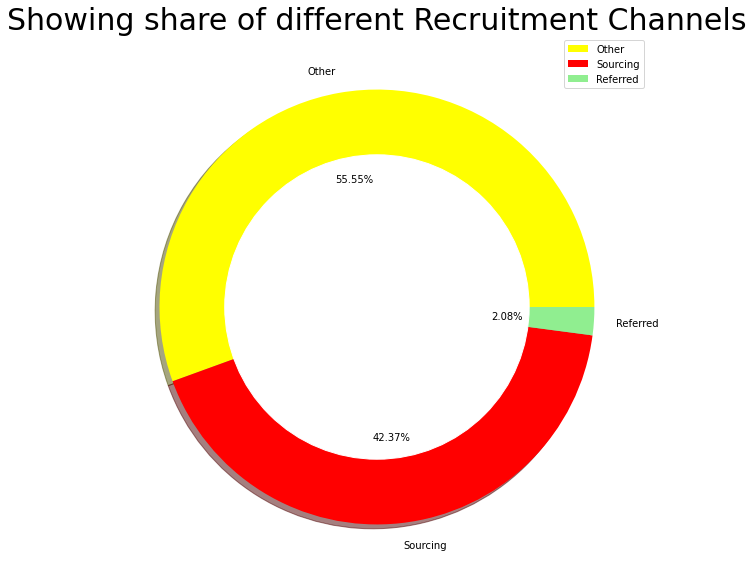

In [141]:
size=[30446,23220,1142]
colors=['yellow','red','lightgreen']
labels='Other','Sourcing','Referred'
explode=0,0.8

my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%')
plt.title('Showing share of different Recruitment Channels', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()


In [147]:
cat.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

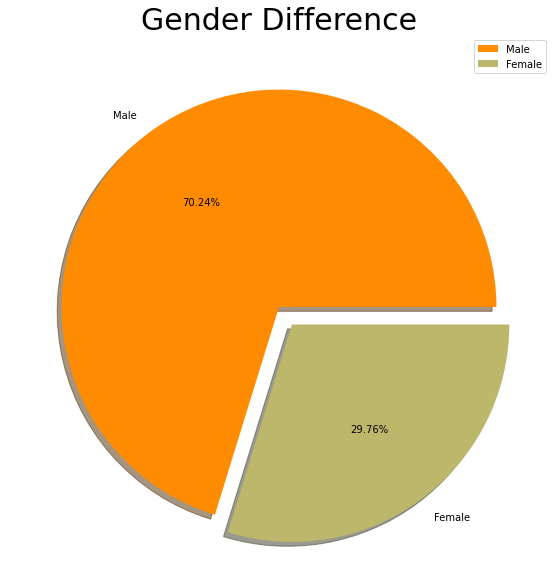

In [151]:
size=[38496,16312]
colors=['darkorange','darkkhaki']
labels='Male','Female'
explode=0,0.1

my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%',explode=explode)
plt.title('Gender Difference',fontsize=30)
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.legend()
plt.show()


**Male population is more in the company(alomst70%)**

In [158]:
cat['KPIs_met >80%'].value_counts(normalize=False)

0    35517
1    19291
Name: KPIs_met >80%, dtype: int64

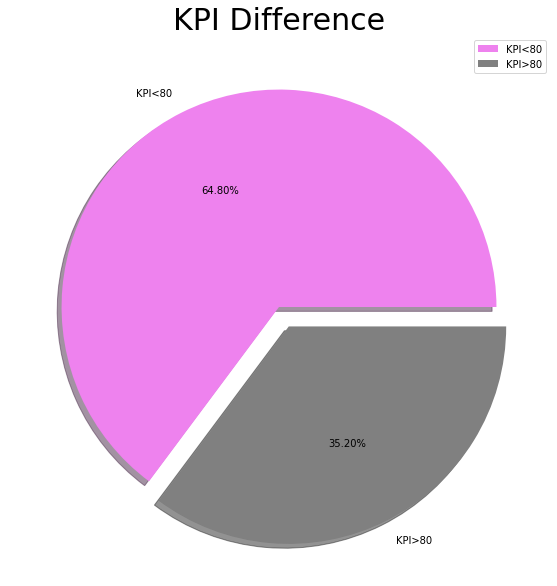

In [160]:
size=[35517,19291]
colors=['violet','grey']
labels='KPI<80','KPI>80'
explode=0,0.1

my_circle=plt.Circle((0,0),0.7,color='white')
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,colors=colors,labels=labels,shadow=True,autopct='%.2f%%',explode=explode)
plt.title('KPI Difference',fontsize=30)
#p = plt.gcf()
#p.gca().add_artist(my_circle)
plt.legend()
plt.show()


**A Key Performance Indicator (KPI) is a measurable value that demonstrates how effectively a company is achieving key business objectives**

**Only 36% perecent employees have achieved KPI more than 80**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


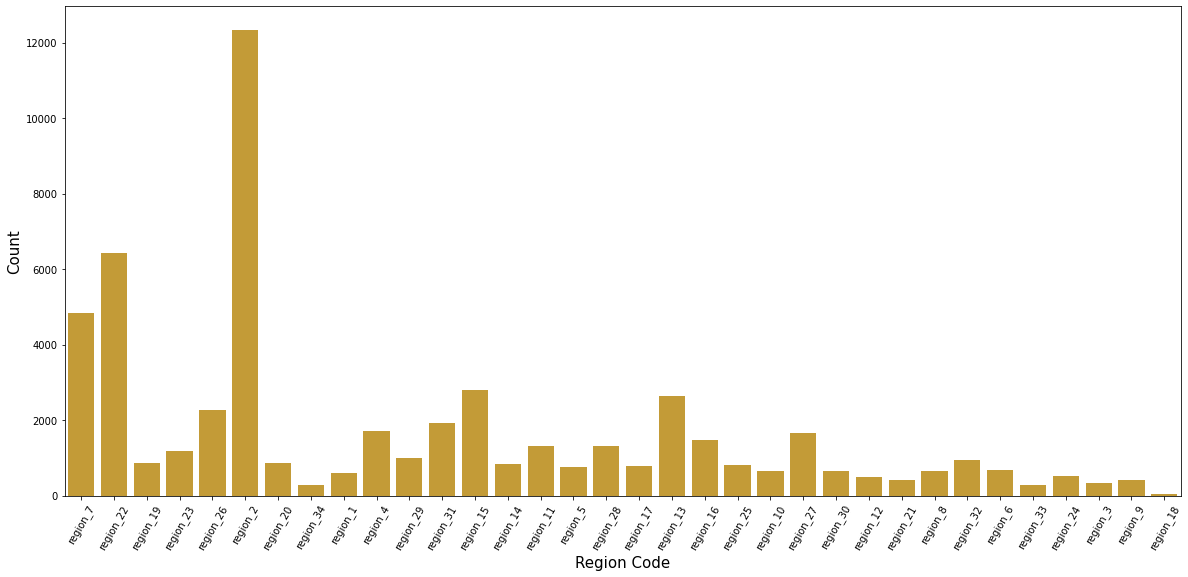

In [170]:
plt.rcParams['figure.figsize']=(20,9)
sns.countplot(cat['region'],color='goldenrod')
plt.xticks(rotation=60)
plt.xlabel('Region Code',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Most of the candidates are from region 2**

In [73]:
  #heart_CAT = cat.columns

#  Categorical Data
#a = 4  # number of rows
#b = 2  # number of columns
#c = 1  # initialize plot counter

#fig = plt.figure(figsize=(22,19))

#for i in heart_CAT:
 # plt.subplot(a, b, c)
  #ax=sns.barplot(y=cat[i].value_counts(normalize=True).mul(100).index,
   #         x=cat[i].value_counts(normalize=True).mul(100).values,
    #        ci=None,palette='muted',orient='h')
  #for rect in ax.patches:
   # ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

  #plt.xticks(rotation=30)

  #plt.title('{}, subplot: {}{}{}'.format(i, a, b, c))
  #plt.ylabel(i)
  #c = c + 1

    
    
    
plt.show()

## **Categorical(Bivariate Analysis)**

Features vs Target variable(is_promoted)

In [12]:
cat.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'is_promoted'],
      dtype='object')

Creating a function which gives me the count of promoted candidates and not promoted candidates with respect to each categorical features

In [190]:
def count(x):
  df=pd.crosstab(data1[x],data1['is_promoted'])
  #df=df.stack().reset_index().rename(columns={0:'sum'})
  df=df.div(df.sum(1).astype(float),axis=0)
  return df

In [199]:
cat.columns

Index(['department', 'education', 'gender', 'recruitment_channel',
       'KPIs_met >80%', 'awards_won?', 'is_promoted', 'region'],
      dtype='object')

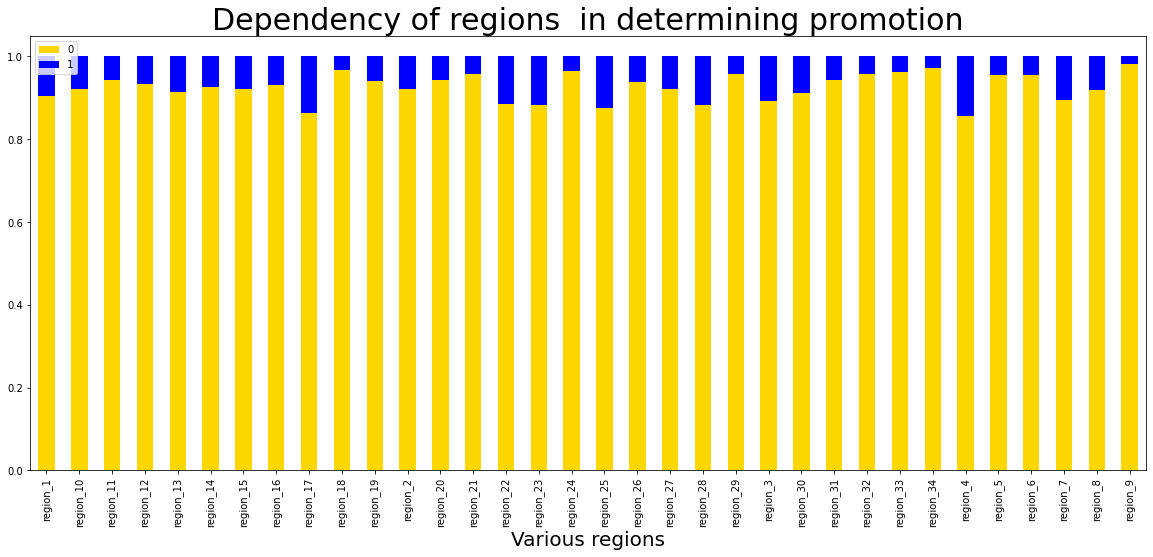

In [213]:
count('region').plot(kind='bar',stacked=True,figsize=(20,8),color=['gold','blue'])
plt.title('Dependency of regions  in determining promotion',fontsize=30)
plt.xlabel('Various regions',fontsize=20)
plt.legend()
plt.show()

**Employess are selected almost equally from all regions**

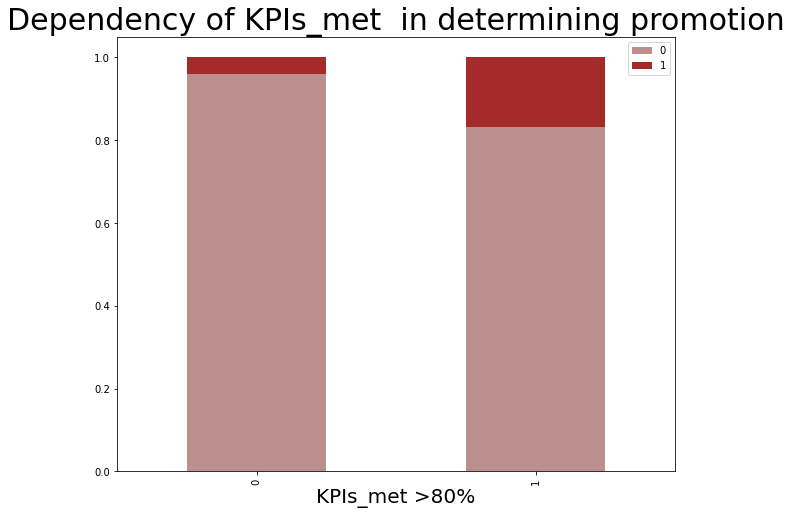

In [211]:
count('KPIs_met >80%').plot(kind='bar',stacked=True,figsize=(10,8),color=['rosybrown','brown'])
plt.title('Dependency of KPIs_met  in determining promotion',fontsize=30)
plt.xlabel('KPIs_met >80%',fontsize=20)
plt.legend()
plt.show()

**As per our assumption we can see that employees with KPI >60 has a higher chance of getting selected**

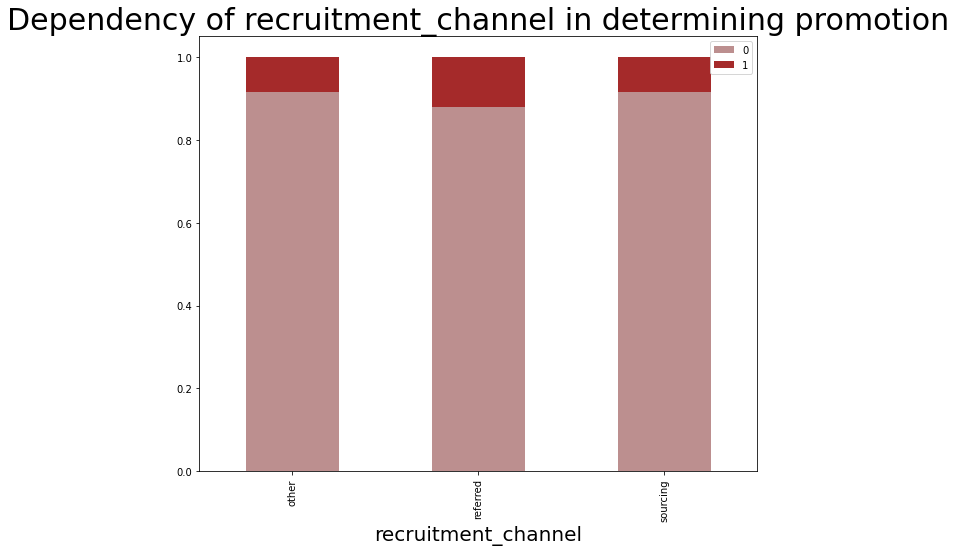

In [209]:
count('recruitment_channel').plot(kind='bar',stacked=True,figsize=(10,8),color=['rosybrown','brown'])
plt.title('Dependency of recruitment_channel in determining promotion',fontsize=30)
plt.xlabel('recruitment_channel',fontsize=20)
plt.legend()
plt.show()

**No visible difference almost same in all sectors**

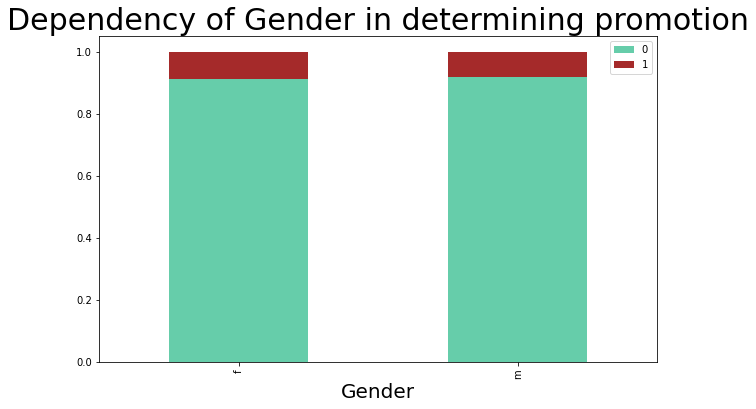

In [205]:
count('gender').plot(kind='bar',stacked=True,figsize=(10,6),color=['mediumaquamarine','brown'])
plt.title('Dependency of Gender in determining promotion',fontsize=30)
plt.xlabel('Gender',fontsize=20)
plt.legend()
plt.show()

**There is no bias among gender,Male and female employee has equal shot**

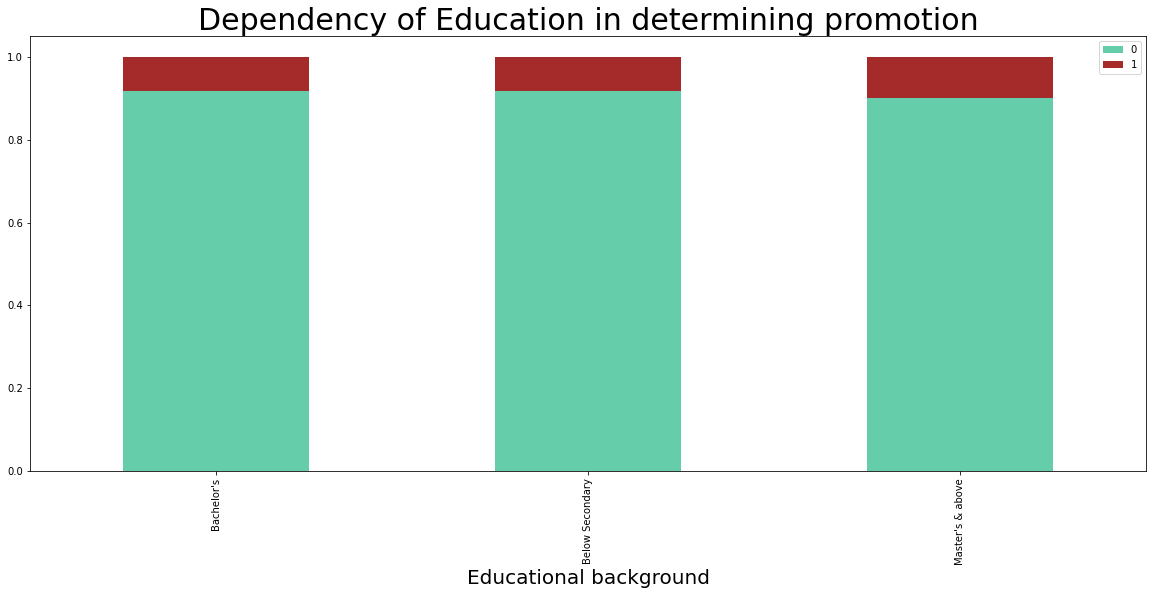

In [200]:
count('education').plot(kind='bar',stacked=True,figsize=(20,8),color=['mediumaquamarine','brown'])
plt.title('Dependency of Education in determining promotion',fontsize=30)
plt.xlabel('Educational background',fontsize=20)
plt.legend()
plt.show()

Well in case of education background,our assumption that employees with master's has a better chance at selection,data shows that there is an equal shot from every background 

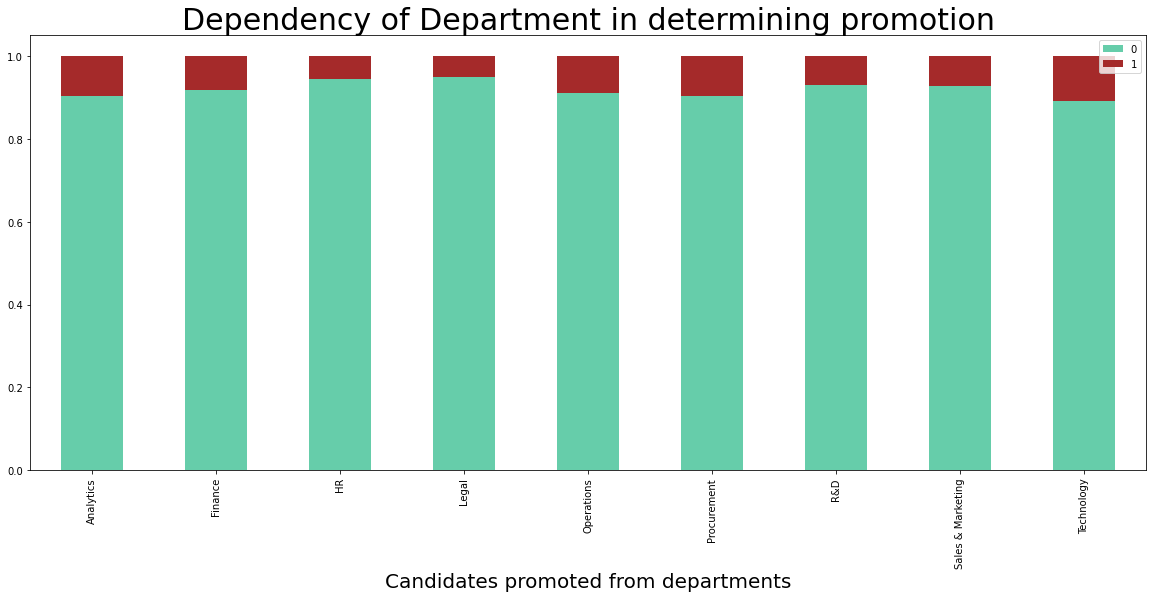

In [198]:
count('department').plot(kind='bar',stacked=True,figsize=(20,8),color=['mediumaquamarine','brown'])
plt.title('Dependency of Department in determining promotion',fontsize=30)
plt.xlabel('Candidates promoted from departments',fontsize=20)
plt.legend()
plt.show()

**No visible difference,candidates are selected equally**

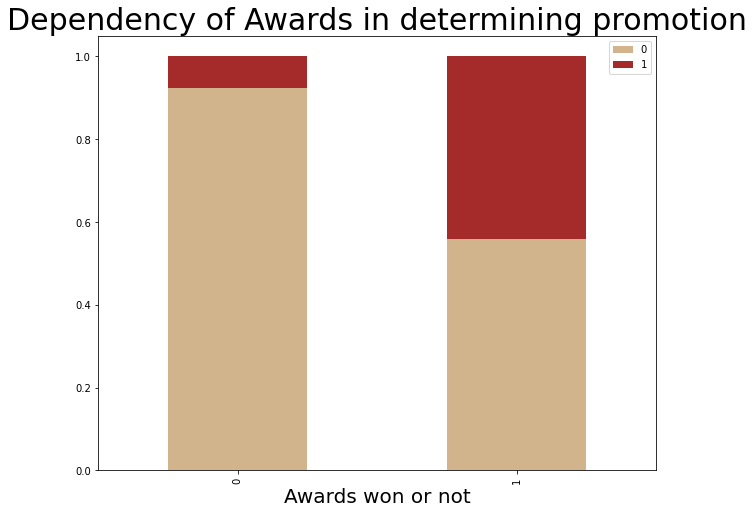

In [192]:
count('awards_won?').plot(kind='bar',stacked=True,figsize=(10,8),color=['tan','brown'])
plt.title('Dependency of Awards in determining promotion',fontsize=30)
plt.xlabel('Awards won or not',fontsize=20)
plt.legend()
plt.show()


**Employees who has won awards has a very good chance to become a manager**

In [15]:

#sns.set_style('whitegrid')
#bar,ax=plt.subplots(figsize=(10,6))
#ax=sns.barplot(y=cat['department'].value_counts(normalize=True).mul(100).index,
 #           x=cat['department'].value_counts(normalize=True).mul(100).values,
  #          ci=None,palette='muted',orient='h')

#ax.set_title('Various Department Count')
#ax.set_ylabel('Percentage')
#ax.set_xlabel('Various Department')
#calculate 
#for rect in ax.patches:
 #   ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )


#  **Numerical Analysis**

##  **Numerical(Univariate Analysis)**

In [17]:
numerical=data1[['no_of_trainings','age','previous_year_rating','length_of_service','avg_training_score']]
numerical.head(3)


,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
0,1,35,5.0,8,49
1,1,30,5.0,4,60
2,1,34,3.0,7,50


In [229]:
numerical.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'avg_training_score'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


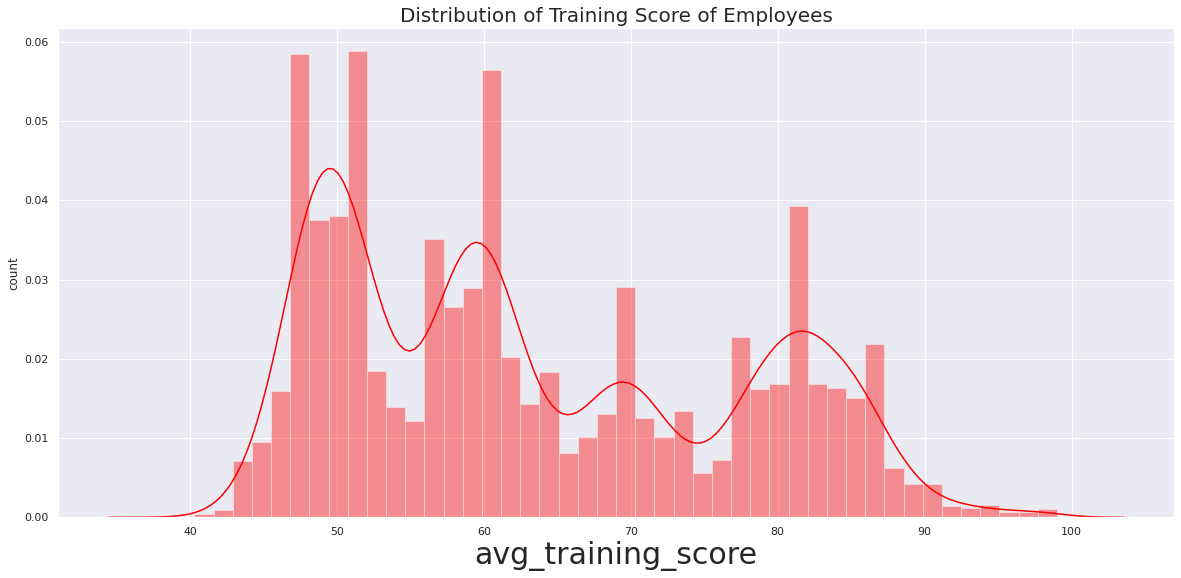

In [233]:
sns.set_theme()
sns.distplot(numerical['avg_training_score'], color = 'red')
plt.title('Distribution of Training Score of Employees', fontsize = 20)
plt.xlabel('avg_training_score', fontsize = 30)
plt.ylabel('count')
plt.show()

***As you can see there are various groups of training score.if needed we can create another feature***

In [238]:
numerical['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


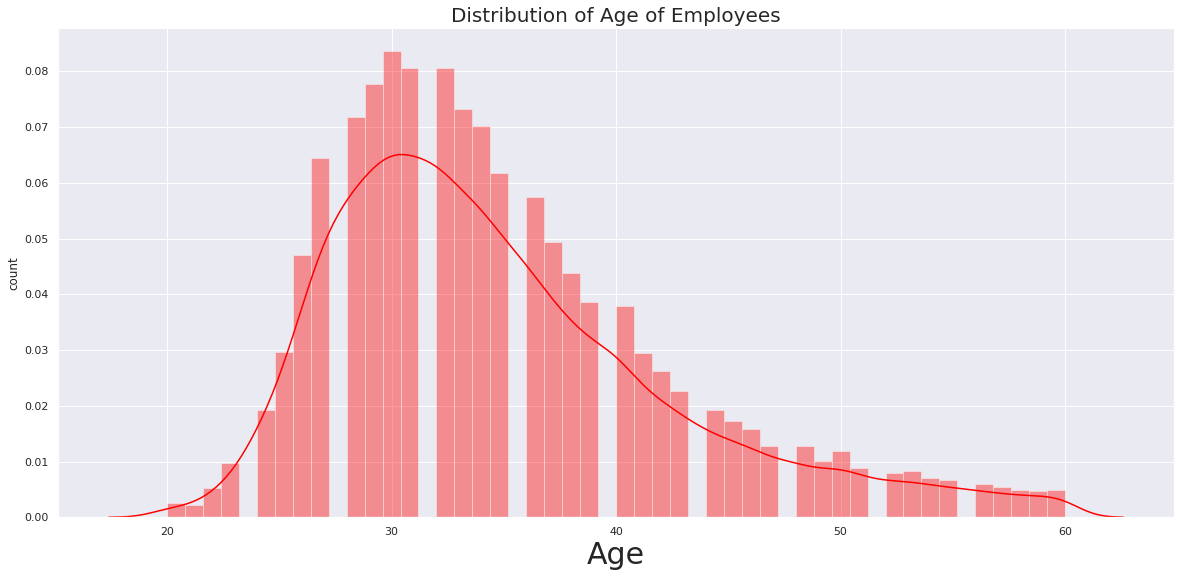

In [234]:
sns.set_theme()
sns.distplot(numerical['age'], color = 'red')
plt.title('Distribution of Age of Employees', fontsize = 20)
plt.xlabel('Age', fontsize = 30)
plt.ylabel('count')
plt.show()

**Age is showing somewhat a normal distribution**

## Numerical(Bivariate Analysis)

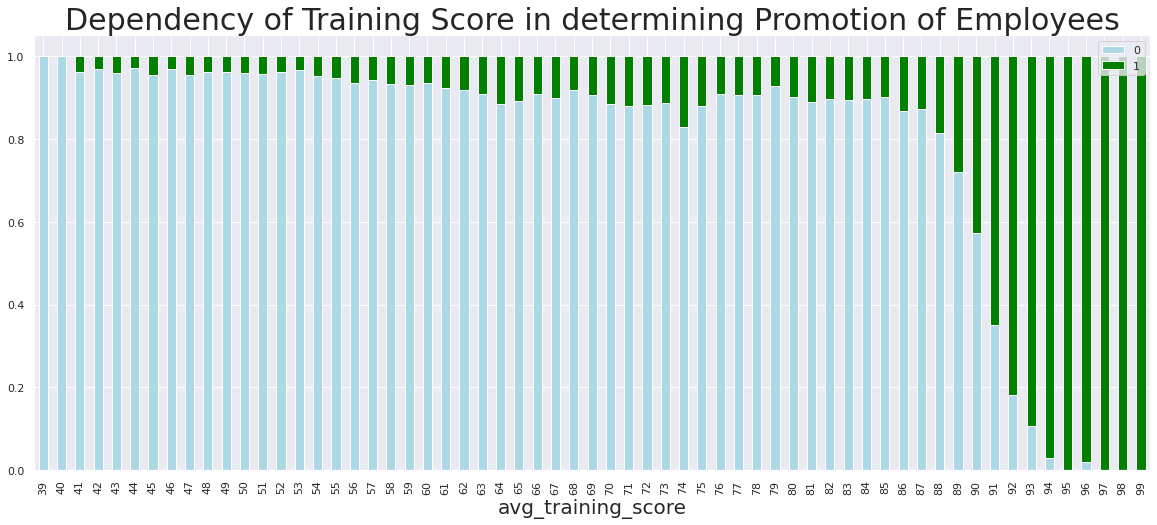

In [232]:
count('avg_training_score').plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Training Score in determining Promotion of Employees', fontsize = 30)
plt.xlabel('avg_training_score', fontsize = 20)
plt.legend()
plt.show()

**As per our assumption the data shows employees with a good training score has a very good chance for promotion**

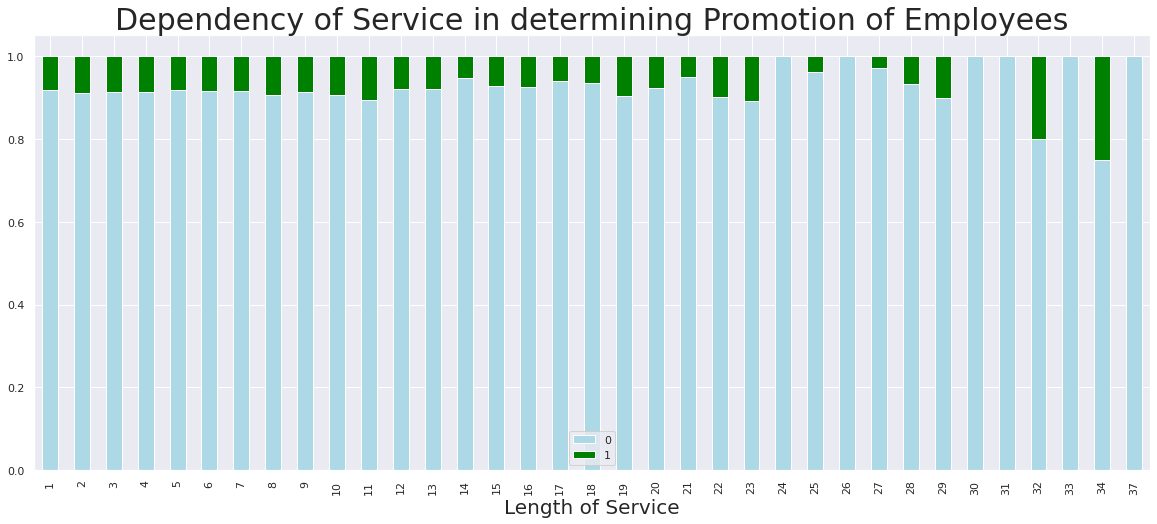

In [227]:
count('length_of_service').plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Service in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Length of Service', fontsize = 20)
plt.legend()
plt.show()

**Length of service has no major impact on promotion of the employee**

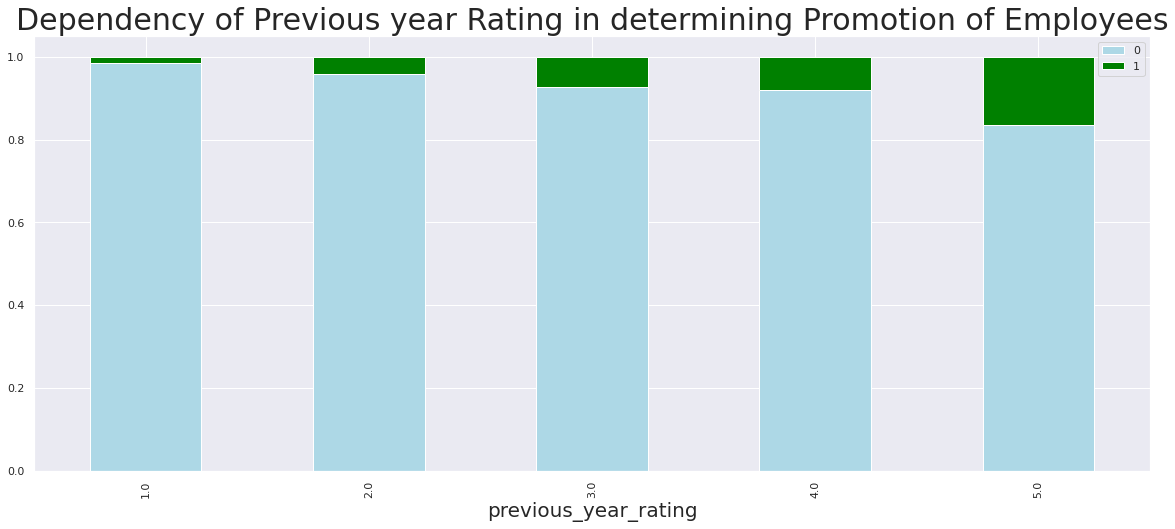

In [226]:
count('previous_year_rating').plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Previous year Rating in determining Promotion of Employees', fontsize = 30)
plt.xlabel('previous_year_rating', fontsize = 20)
plt.legend()
plt.show()

**Previous year rating somewhat effect promotion status,ratings of 5 have a good chance**

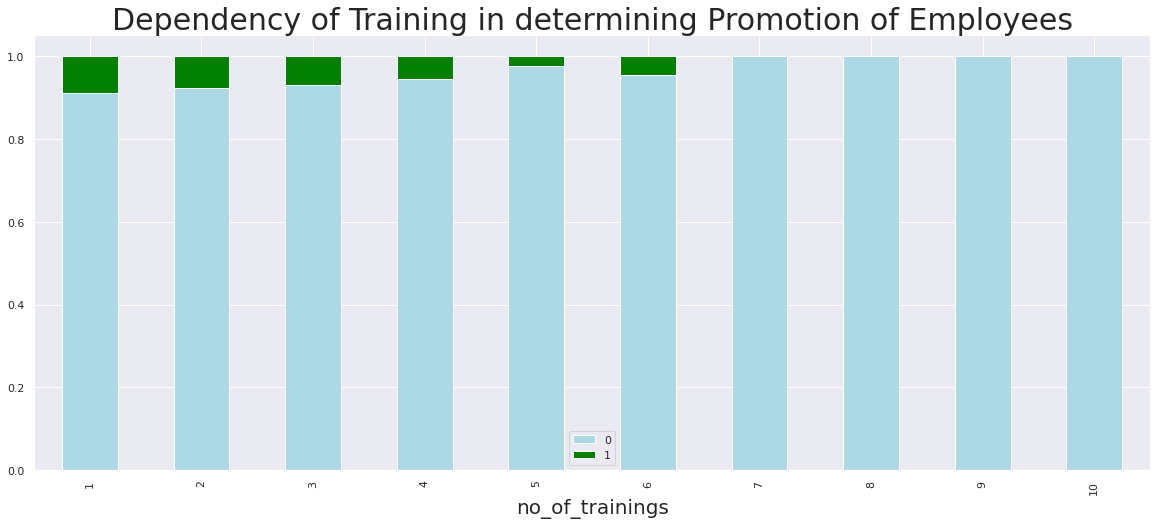

In [225]:
count('no_of_trainings').plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Training in determining Promotion of Employees', fontsize = 30)
plt.xlabel('no_of_trainings', fontsize = 20)
plt.legend()
plt.show()

**No of trainings has no significant effect**

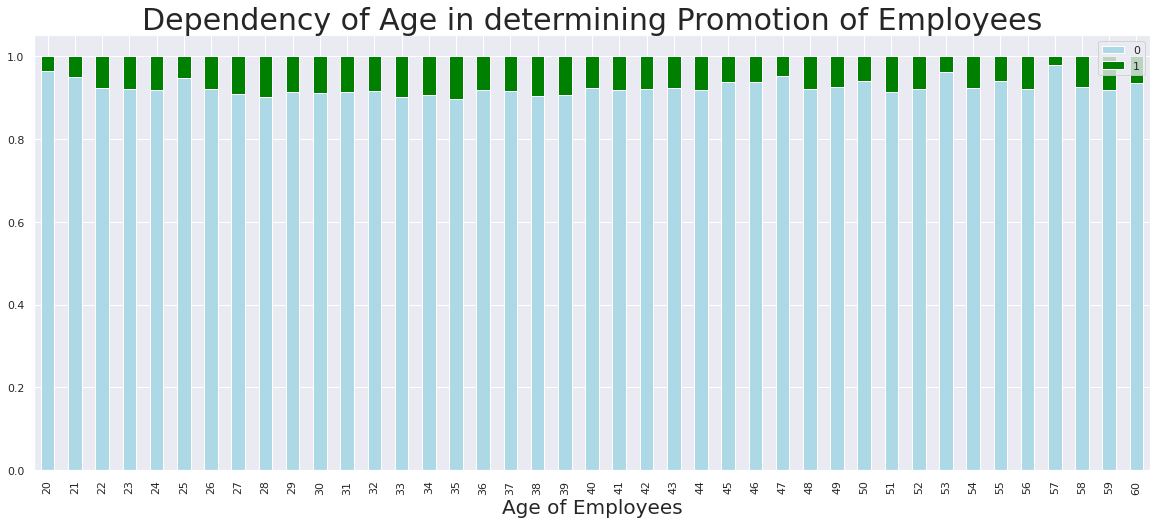

In [235]:
count('age').plot(kind = 'bar', stacked = True, figsize = (20, 8), color = ['lightblue', 'green'])

plt.title('Dependency of Age in determining Promotion of Employees', fontsize = 30)
plt.xlabel('Age of Employees', fontsize = 20)
plt.legend()
plt.show()

**Age is no factor in determining promotion,Surprisingly age of 20-23 have also been selected for promotion**

# **Final Observations**

1.   **As per our assumption we can see that employees with KPI >60 has      higher chance of getting selected**
2.    **Employees who has won awards has a very good chance to become a manager**
3. **As per our assumption the data shows employees with a good training score has a very good chance for promotion**
4.  **Previous year rating somewhat effect promotion status,ratings of 5 have a good chance**
